In [7]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def image_to_tensor(image_path):
    # Define a transform to convert the image to tensor
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
    # Open the image file
    image = Image.open(image_path)
    
    # Apply the transform to the image
    tensor = transform(image)
    
    return tensor

In [9]:
def compute(patch):
    weight, height = patch[0].size
    m = weight
    res = 0
    patch_np = np.array(patch[0]).astype(np.int64)
    diff_horizontal = np.sum(np.abs(patch_np[:, :-1, :] - patch_np[:, 1:, :]))
    diff_vertical = np.sum(np.abs(patch_np[:-1, :, :] - patch_np[1:, :, :]))
    diff_diagonal = np.sum(np.abs(patch_np[:-1, :-1, :] - patch_np[1:, 1:, :]))
    diff_diagonal += np.sum(np.abs(patch_np[1:, :-1, :] - patch_np[:-1, 1:, :]))
    res = diff_horizontal + diff_vertical + diff_diagonal
    return res.sum()

In [10]:
def patch_img(img, img_f, patch_size=32, height=256):
    img_width, img_height = img.size
    height = int(height)
    patch_size = int(patch_size)
    num_patch = (height // patch_size) * (height // patch_size)
    patch_list = []
    min_len = min(img_height, img_width)
    rz = transforms.Resize((height, height))
    if min_len < patch_size:
        img = rz(img)
        img_f = rz(img_f)
    rp = transforms.RandomCrop(patch_size)
    # 随机生成num_patch个不重复随机种子
    seeds = np.random.choice(100000, num_patch, replace=False)
    for i in range(num_patch):
        seed = seeds[i]
        torch.random.manual_seed(seed)
        rp_img = rp(img)
        torch.random.manual_seed(seed)
        rp_img_f = rp(img_f)
        patch_list.append([rp_img, rp_img_f])
    patch_list.sort(key=lambda x: compute(x), reverse=False)
    new_img, new_img_f = patch_list[0][0], patch_list[0][1]
    return new_img, new_img_f

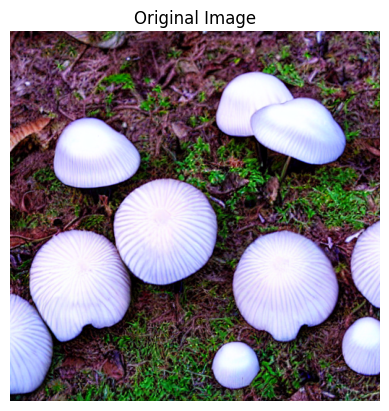

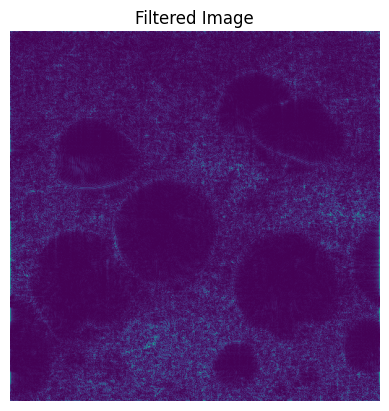

tensor([[[0.0235, 0.1647, 0.0706,  ..., 0.0275, 0.0235, 0.0196],
         [0.0000, 0.0431, 0.0510,  ..., 0.0549, 0.0784, 0.0863],
         [0.0275, 0.0235, 0.0275,  ..., 0.0510, 0.0706, 0.0392],
         ...,
         [0.0431, 0.0157, 0.0275,  ..., 0.0118, 0.0784, 0.0745],
         [0.0627, 0.0471, 0.0157,  ..., 0.0118, 0.0039, 0.0745],
         [0.0745, 0.0510, 0.0745,  ..., 0.0353, 0.0980, 0.0118]]])
Min value: 0.0
Max value: 0.34117648005485535
Mean value: 0.017902225255966187


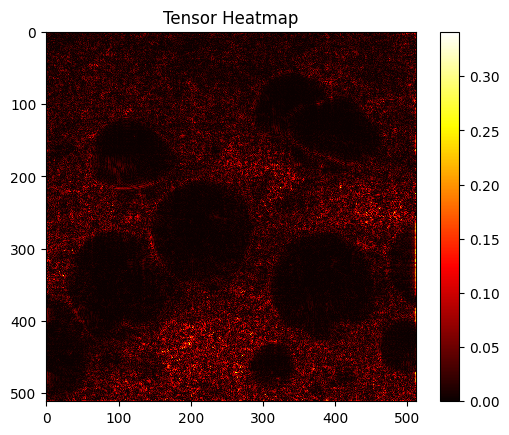

tensor([[[0.0690, 0.4828, 0.2069,  ..., 0.0805, 0.0690, 0.0575],
         [0.0000, 0.1264, 0.1494,  ..., 0.1609, 0.2299, 0.2529],
         [0.0805, 0.0690, 0.0805,  ..., 0.1494, 0.2069, 0.1149],
         ...,
         [0.1264, 0.0460, 0.0805,  ..., 0.0345, 0.2299, 0.2184],
         [0.1839, 0.1379, 0.0460,  ..., 0.0345, 0.0115, 0.2184],
         [0.2184, 0.1494, 0.2184,  ..., 0.1034, 0.2874, 0.0345]]])
Normalized Min value: 0.0
Normalized Max value: 1.0
Normalized Mean value: 0.05247204005718231


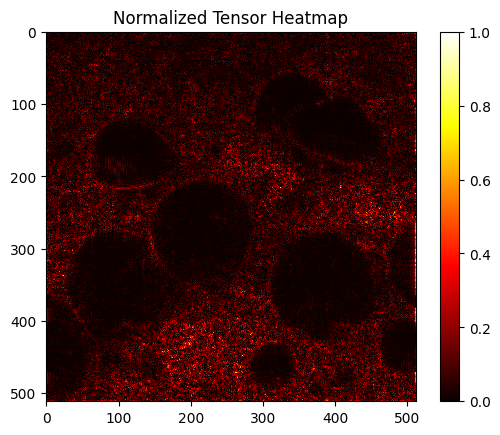

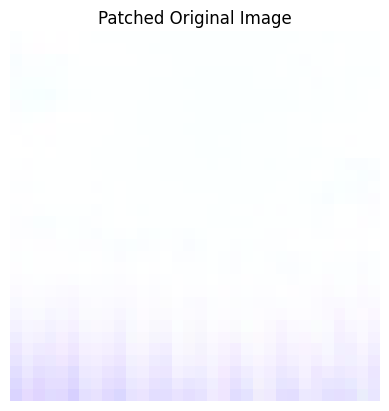

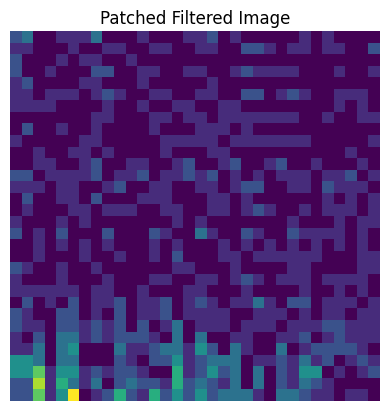

tensor([[[0.0078, 0.0118, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0078],
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0157, 0.0157, 0.0235,  ..., 0.0000, 0.0039, 0.0078],
         [0.0078, 0.0078, 0.0275,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0078, 0.0235,  ..., 0.0039, 0.0039, 0.0000]]])
Patched Min value: 0.0
Patched Max value: 0.0313725508749485
Patched Mean value: 0.0031020219903439283


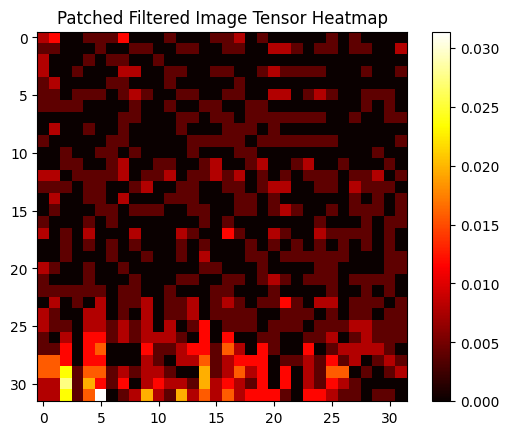

tensor([[[0.2500, 0.3750, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1250, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 0.2500],
         [0.2500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.5000, 0.5000, 0.7500,  ..., 0.0000, 0.1250, 0.2500],
         [0.2500, 0.2500, 0.8750,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.7500,  ..., 0.1250, 0.1250, 0.0000]]])
Normalized Patched Min value: 0.0
Normalized Patched Max value: 1.0
Normalized Patched Mean value: 0.098876953125


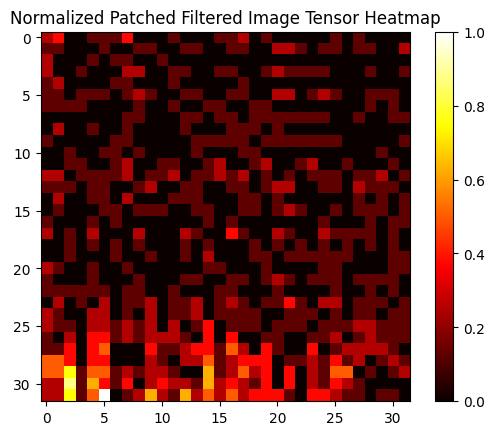

In [11]:
if __name__ == "__main__":
    image_path = '/hexp/data/genImage/imagenet_ai_0419_sdv4/train/ai/992_sdv4_00072.png'  # Replace with your image path
    image_f_path = '/hexp/data/genImage_filtered/imagenet_ai_0419_sdv4/train/ai/992_sdv4_00072_f.png'  # Replace with your image path
    # Display the original image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    # Display the filtered image
    image_f = Image.open(image_f_path)
    plt.imshow(image_f)
    plt.title('Filtered Image')
    plt.axis('off')
    plt.show()
    # tensor
    tensor = image_to_tensor(image_f_path)
    print(tensor)
    print(f"Min value: {tensor.min().item()}")
    print(f"Max value: {tensor.max().item()}")
    print(f"Mean value: {tensor.mean().item()}")
    plt.imshow(tensor.permute(1, 2, 0).numpy(), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Tensor Heatmap')
    plt.show()
    # normalized_tensor
    normalized_tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
    print(normalized_tensor)
    print(f"Normalized Min value: {normalized_tensor.min().item()}")
    print(f"Normalized Max value: {normalized_tensor.max().item()}")
    print(f"Normalized Mean value: {normalized_tensor.mean().item()}")
    plt.imshow(normalized_tensor.permute(1, 2, 0).numpy(), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Normalized Tensor Heatmap')
    plt.show()
    # patch_img
    img_p, img_f_p = patch_img(image, image_f)
    # Display the patched images
    plt.imshow(img_p)
    plt.title('Patched Original Image')
    plt.axis('off')
    plt.show()
    plt.imshow(img_f_p)
    plt.title('Patched Filtered Image')
    plt.axis('off')
    plt.show()
    img_f_p_tensor = transforms.ToTensor()(img_f_p)
    print(img_f_p_tensor)
    print(f"Patched Min value: {img_f_p_tensor.min().item()}")
    print(f"Patched Max value: {img_f_p_tensor.max().item()}")
    print(f"Patched Mean value: {img_f_p_tensor.mean().item()}")
    plt.imshow(img_f_p_tensor.permute(1, 2, 0).numpy(), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Patched Filtered Image Tensor Heatmap')
    plt.show()
    # normalized_patched_tensor
    normalized_img_f_p_tensor = (img_f_p_tensor - img_f_p_tensor.min()) / (img_f_p_tensor.max() - img_f_p_tensor.min())
    print(normalized_img_f_p_tensor)
    print(f"Normalized Patched Min value: {normalized_img_f_p_tensor.min().item()}")
    print(f"Normalized Patched Max value: {normalized_img_f_p_tensor.max().item()}")
    print(f"Normalized Patched Mean value: {normalized_img_f_p_tensor.mean().item()}")
    plt.imshow(normalized_img_f_p_tensor.permute(1, 2, 0).numpy(), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Normalized Patched Filtered Image Tensor Heatmap')
    plt.show()
